# Filtracja splotowa
http://pforczmanski.zut.edu.pl/homepage/?page_id=55

http://www.mkramarczyk.zut.edu.pl/?page_id=1115

Funkcja realizująca filtr splotowy.
Mamy obraz i maskę (która jest macierzą mniejszą niż obraz). Jest wyznaczony punkt 
f - maska
g - obraz
$out = \frac{\sum_{ij} f(i,j) g(i,j)}{norm}$

dla 3x3 - n = 9

Wykrywanie krawędzi w obrazie:

* LAPLACE'A
    - 4 albo 8 spójna można jedną wybrać
* SOBELA
* PREWITTA
* ROBERTSA
* KIRSCHA

Krawędzie poziome pionowe i przekątne. Połączyć tak żeby w obrazie wszystkie krawędzie byłī widoczne.

Można przez dodanie obrazów do siebie, wartości bezwględne, albo kwadratować dodać spierwiastkowac

Obrazy różny kontrast, jasność - spróbować ujednolicić.

Porównać percepcyjnie wyniki (5 obrazków) porównań pod kątem skuteczności wykrywania krawędzi:
1. Dokładność - powiększając czy krawędź w dobrym wierszu - najdokładniej wykrywa krawędź
2. Odporność na szum - niektóre filtry bardziej eksponują - który najmniej i najbardziej odporny na szum - w ciemniejszym nie widać szumu
3. Jednoznaczność - grubość krawędzi które wykrywamy - szerokości większej niż 1 piksel, nie jest to potrzebne. W powiększeniu - które krawędzie jednopikselowe które dwu-trzy pikselowe.



In [2]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt

obr = img.imread('litery_1.png')
plt.imshow(obr)

In [6]:
def ffilter(img, mask):
    img_new = img.copy()
    [M, N] = img.shape
    [M_mask, N_mask] = mask.shape 
    norma = np.sum(mask)
    if norma == 0:
        norma = 1
        
#     if mask.shape[0] == 2:
#         gora = np.zeros((1, 2))
#         lewo = np.zeros((3, 1))
#         mask = np.concatenate((gora, mask), axis=0)
#         mask = np.concatenate((lewo, mask), axis=1)
    
    for i in range (1, M-1):
        for j in range (1, N-1):
            #mnozenie = mask * img[i:i+M_mask, j:j+N_mask]
            #dodane = np.sum(wymnozone)
            img_new[i, j] = np.sum(mask * img[i-1:i+M_mask-1,j-1:j+N_mask-1])/norma
    return img_new

## Testowa maska - rozmazanie

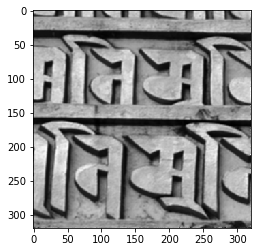

In [4]:
obr = img.imread('litery_1.png')
obr = obr[:,:,0]
mask = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
obr = ffilter(obr, mask)
plt.imshow(obr, cmap='gray')

## Filtr Robertsa

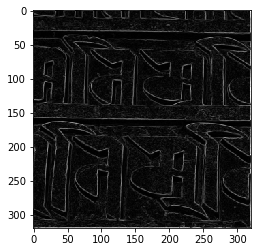

In [5]:
obr = img.imread('litery_1.png')
obr = obr[:,:,0]
mask1 = np.array([[-1, 0], [1, 0]])
obr1 = obr.copy()
obr1 = ffilter(obr, mask1)

mask2 = np.array([[-1, 1], [0, 0]])
obr2 = obr.copy()
obr2 = ffilter(obr, mask2)

mask3 = np.array([[0, 1], [-1, 0]])
obr3 = obr.copy()
obr3 = ffilter(obr, mask3)

mask4 = np.array([[1, 0], [0, -1]])
obr4 = obr.copy()
obr4 = ffilter(obr, mask4)

roberts = np.sqrt(np.power(obr1,2) + np.power(obr2,2) + np.power(obr3,2) + np.power(obr4, 2))
plt.imshow(roberts, cmap=plt.cm.gray)

## Filtr Laplace

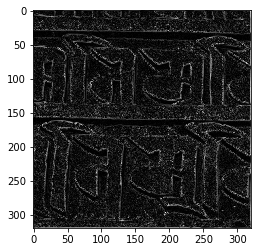

In [6]:
obr = img.imread('litery_1.png')
obr = obr[:,:,0]
mask1 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
obr1 = obr.copy()
obr1 = ffilter(obr, mask1)

mask2 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
obr2 = obr.copy()
obr2 = ffilter(obr, mask2)
laplace = np.sqrt(np.power(obr1,2) + np.power(obr2,2))
plt.imshow(laplace, cmap=plt.cm.gray)

## Filtr Prewitta

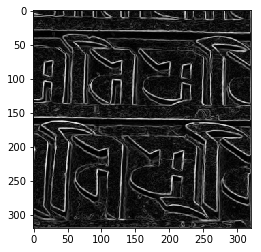

In [7]:
obr = img.imread('litery_1.png')
obr = obr[:,:,0]
mask1 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
obr1 = obr.copy()
obr1 = ffilter(obr, mask1)

mask2 = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
obr2 = obr.copy()
obr2 = ffilter(obr, mask2)

mask3 = np.array([[0, 1, 1], [-1, 0, 1], [-1, -1, 0]])
obr3 = obr.copy()
obr3 = ffilter(obr, mask3)

mask4 = np.array([[-1, -1, 0], [-1, 0, 1], [0, 1, 1]])
obr4 = obr.copy()
obr4 = ffilter(obr, mask4)
prewitt = np.sqrt(np.power(obr1,2) + np.power(obr2,2) + np.power(obr3,2) + np.power(obr4, 2))
plt.imshow(prewitt, cmap=plt.cm.gray)

## Filtr Sobela

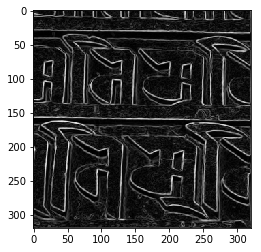

In [8]:
obr = img.imread('litery_1.png')
obr = obr[:,:,0]
mask1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
obr1 = obr.copy()
obr1 = ffilter(obr, mask1)

mask2 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
obr2 = obr.copy()
obr2 = ffilter(obr, mask2)

mask3 = np.array([[0, 1, 2], [-1, 0, 1], [-2, -1, 0]])
obr3 = obr.copy()
obr3 = ffilter(obr, mask3)

mask4 = np.array([[-2, -1, 0], [-1, 0, 1], [0, 1, 2]])
obr4 = obr.copy()
obr4 = ffilter(obr, mask4)
sobel = np.sqrt(np.power(obr1, 2) + np.power(obr2, 2) + np.power(obr3, 2) + np.power(obr4, 2));
plt.imshow(sobel, cmap=plt.cm.gray)

## Filtr Kirscha

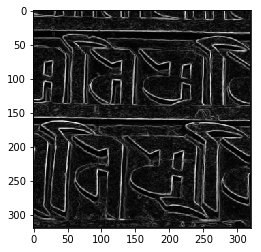

In [8]:
obr = img.imread('litery_1.png')
obr = obr[:,:,0]
mask1 = np.array([[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]])
obr1 = obr.copy()
obr1 = ffilter(obr, mask1)

mask2 = np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]])
obr2 = obr.copy()
obr2 = ffilter(obr, mask2)

mask3 = np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]])
obr3 = obr.copy()
obr3 = ffilter(obr, mask3)

mask4 = np.array([[5, 5, -3], [5, 0, -3], [-3, -3, -3]])
obr4 = obr.copy()
obr4 = ffilter(obr, mask4)

mask5 = np.array([[5, -3, -3], [5, 0, -3], [5, -3, -3]])
obr5 = obr.copy()
obr5 = ffilter(obr, mask5)

mask6 = np.array([[-3, -3, -3], [5, 0, -3], [5, 5, -3]])
obr6 = obr.copy()
obr6 = ffilter(obr, mask6)

mask7 = np.array([[-3, -3, -3], [-3, 0, -3], [5, 5, 5]])
obr7 = obr.copy()
obr7 = ffilter(obr, mask7)

mask8 = np.array([[-3, -3, -3], [-3, 0, 5], [-3, 5, 5]])
obr8 = obr.copy()
obr8 = ffilter(obr, mask8)

y1 = np.maximum(obr1, obr2)
y2 = np.maximum(y1, obr3)
y3 = np.maximum(y2, obr4)
y4 = np.maximum(y3, obr5)
y5 = np.maximum(y4, obr6)
y6 = np.maximum(y5, obr7)
y7 = np.maximum(y6, obr8)
kirsch = y7
#kirsch = np.sqrt(np.power(obr1,2) + np.power(obr2,2) + np.power(obr3,2) + np.power(obr4, 2) + np.power(obr5, 2)+ np.power(obr6, 2)+ np.power(obr7, 2)+ np.power(obr8, 2))
plt.imshow(np.absolute(kirsch), cmap=plt.cm.gray)

In [10]:
plt.imsave('filtry/roberts.png', roberts)
plt.imsave('filtry/laplace.png', laplace)
plt.imsave('filtry/prewitt.png', prewitt)
plt.imsave('filtry/sobel.png', sobel)
plt.imsave('filtry/kirsch.png', kirsch)

## Porównanie filtrów

Porównać percepcyjnie wyniki (5 obrazków) porównań pod kątem skuteczności wykrywania krawędzi:
1. Dokładność - powiększając czy krawędź w dobrym wierszu - najdokładniej wykrywa krawędź
2. Odporność na szum - niektóre filtry bardziej eksponują - który najmniej i najbardziej odporny na szum - w ciemniejszym nie widać szumu
3. Jednoznaczność - grubość krawędzi które wykrywamy - szerokości większej niż 1 piksel, nie jest to potrzebne. W powiększeniu - które krawędzie jednopikselowe które dwu-trzy pikselowe.
![images/porownanie.png](images/porownanie.png)

Roberts:
* wrażliwy na szum

Sobel:
* mniej wrażliwy na szum od Robertsa
* mała precyzja (grube krawędzie)

Laplace:
* największa wrażliwość na szum